In [6]:
from hdimvis.algorithms.spring_force_algos.hybrid_algo.Hybrid import Hybrid
from hdimvis.create_low_d_layout.LayoutCreation import LayoutCreation
from hdimvis.data_fetchers.DataFetcher import DataFetcher
from experiments.cube.Cube import Cube
from pathlib import Path
from definitions import PROJECT_ROOT
import pickle
from hdimvis.visualise_layouts_and_metrics.plot import show_layout,show_generation_metrics


In [3]:
cube = Cube(num_points=100, side=30, angle=0.4)
dataset= cube.get_sample_dataset(3000)

In [ ]:
rna = DataFetcher.fetch_data('rna N3k')
coli20 =  DataFetcher.fetch_data('coil20')
globe = DataFetcher.fetch_data('globe', size=3000)
fmnist = DataFetcher.fetch_data('fashion mnist', size=3000)
mnist = DataFetcher.fetch_data('mnist', size=3000)

datasets = [rna, coli20,globe,fmnist, mnist]
dataset_names = ['rna N3k', 'coli20', 'globe', 'fashion mnist', 'mnist']

In [ ]:
num_repeats = 10
results = {name: [[],[]] for name in dataset_names}

####################
The algorithm will use a random initialization for the low D embedding/layout
####################
A 2D layout of the "3d cube of 30^3 points - 3000 points sampled" dataset will be created 
using the "Hybrid" algorithm
####################
The HD distance measure used is: euclidean
####################
####################
No metrics will be collected during layout creation. 
To change this use the 'metric collection' parameter of the layout 
####################
All stress calculations will be performed using the euclidian norm
####################
Spring constant is set to  0.5 
Damping constant is set to 0 
Spring constant scaling factor is set to 0.03333333333333333 
####################


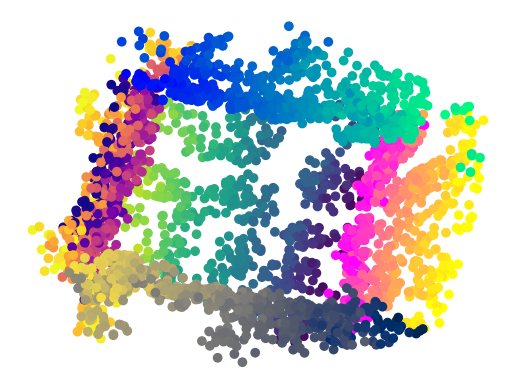

In [9]:


for i, name in dataset_names:
    for j in num_repeats:

        hybrid_no_corr = Hybrid(dataset=dataset, alpha=0.6, sample_set_size=10, neighbour_set_size=5, use_correct_interpolation_error=False)
        hybrid_layout_no_corr = LayoutCreation().create_layout(hybrid_no_corr, optional_metric_collection=None)
        results[name][0].append(hybrid_layout_no_corr)


        hybrid_corr = Hybrid(dataset=dataset, alpha=0.6,
                            use_knnd=False, sample_set_size=10, neighbour_set_size=5, use_correct_interpolation_error=True)
        hybrid_layout_corr = LayoutCreation().create_layout(hybrid_corr, optional_metric_collection=None)
        results[name][1].append(hybrid_layout_corr)

output_dir= (Path(PROJECT_ROOT).joinpath(
    Path(f"experiments/hybrid_placement/out/"))).resolve().absolute()

path_to_pickle_lay = (Path(output_dir).joinpath(Path(f"layouts_all_datasets.pickle"))).resolve()
with open(path_to_pickle_lay, 'wb') as pickle_out:
    pickle.dump(results, pickle_out)

####################
The algorithm will use a random initialization for the low D embedding/layout
####################
A 2D layout of the "3d cube of 30^3 points - 3000 points sampled" dataset will be created 
using the "Hybrid" algorithm
####################
The HD distance measure used is: euclidean
####################
####################
No metrics will be collected during layout creation. 
To change this use the 'metric collection' parameter of the layout 
####################
All stress calculations will be performed using the euclidian norm
####################
Spring constant is set to  0.5 
Damping constant is set to 0 
Spring constant scaling factor is set to 0.03333333333333333 
####################


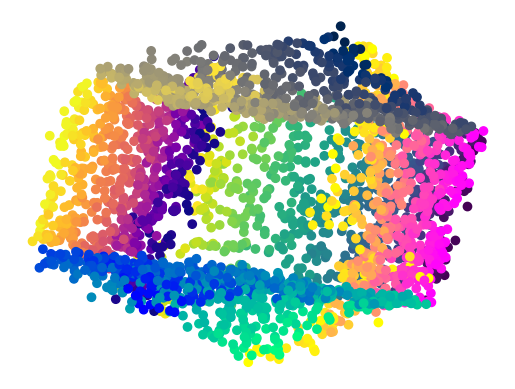

In [10]:


cube.plot_2d(layout=hybrid_layout)

In [5]:
num_repeats = 20
layouts = [[],[]]


for i in range(num_repeats):
    hybrid_correct = Hybrid(dataset=dataset, alpha=0.6,
                        use_knnd=False, sample_set_size=10, neighbour_set_size=5, use_correct_interpolation_error=True)
    hybrid_layout_correct = LayoutCreation().create_layout(hybrid_correct, optional_metric_collection=None)
    layouts[0].append(hybrid_layout_correct)


    hybrid = Hybrid(dataset=dataset, alpha=0.6,
                        use_knnd=False, sample_set_size=10, neighbour_set_size=5, use_correct_interpolation_error=False)
    hybrid_layout = LayoutCreation().create_layout(hybrid, optional_metric_collection=None)
    layouts[1].append(hybrid_layout)

output_dir= (Path(PROJECT_ROOT).joinpath(Path(f"experiments/hybrid_placement/out/"))).resolve().absolute()

path_to_pickle_arr = (Path(output_dir).joinpath(Path(f"layouts.pickle"))).resolve()
with open(path_to_pickle_arr, 'wb') as pickle_out:
    pickle.dump(layouts, pickle_out)


####################
The algorithm will use a random initialization for the low D embedding/layout
####################
A 2D layout of the "3d cube of 30^3 points - 3000 points sampled" dataset will be created 
using the "Hybrid" algorithm
####################
The HD distance measure used is: euclidean
####################
####################
No metrics will be collected during layout creation. 
To change this use the 'metric collection' parameter of the layout 
####################
All stress calculations will be performed using the euclidian norm
####################
Spring constant is set to  0.5 
Damping constant is set to 0 
Spring constant scaling factor is set to 0.03333333333333333 
####################
####################
The algorithm will use a random initialization for the low D embedding/layout
####################
A 2D layout of the "3d cube of 30^3 points - 3000 points sampled" dataset will be created 
using the "Hybrid" algorithm
####################
The HD distance m

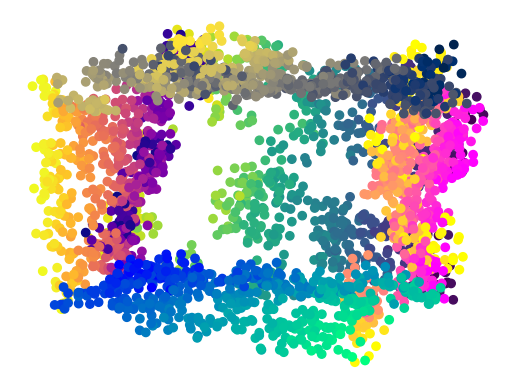

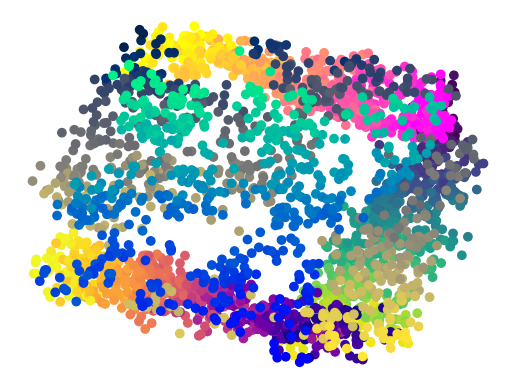

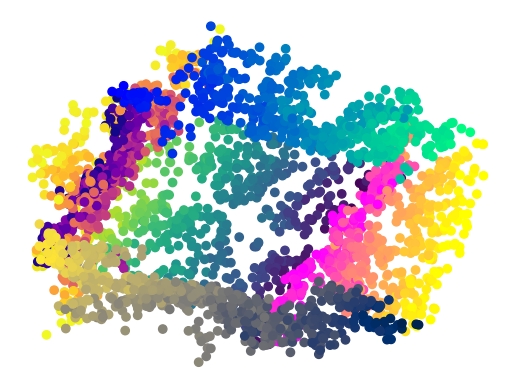

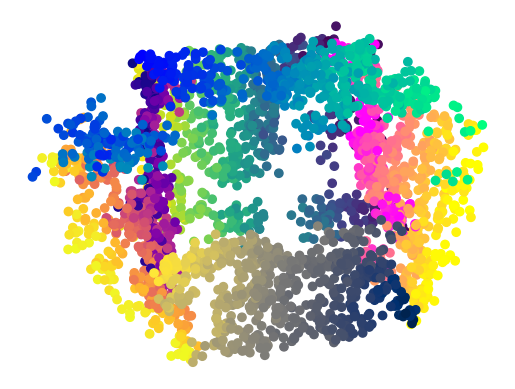

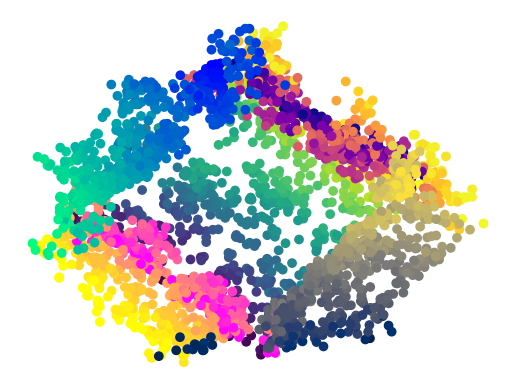

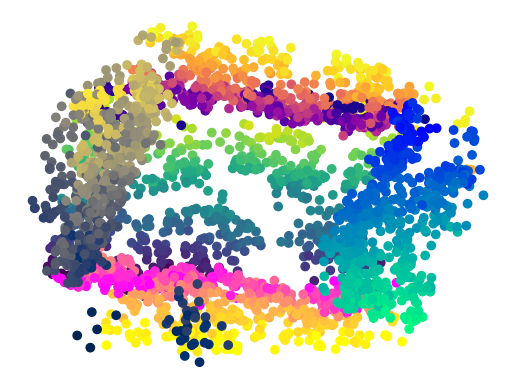

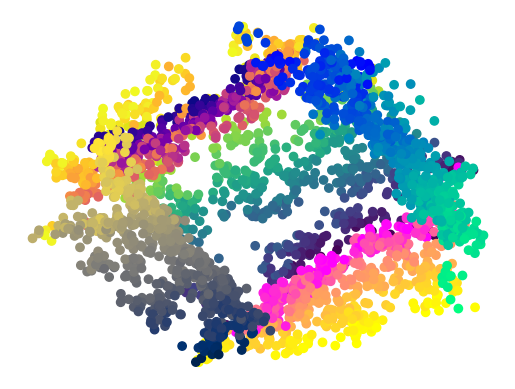

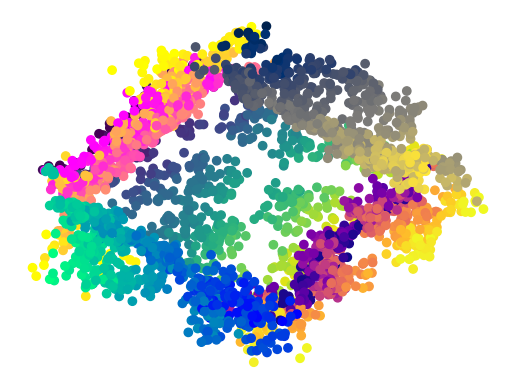

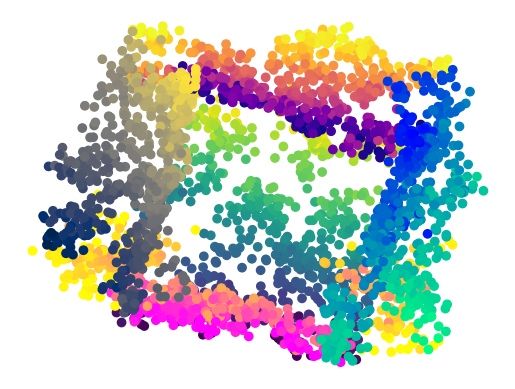

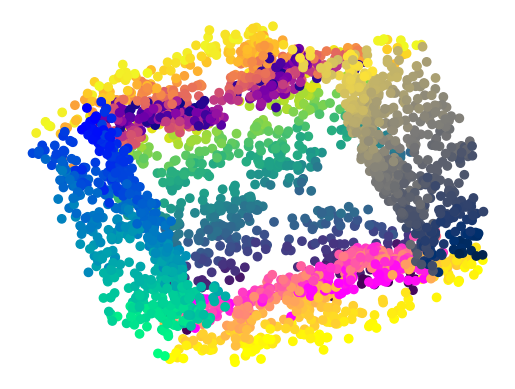

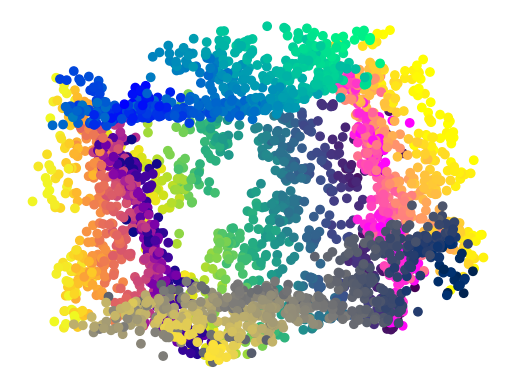

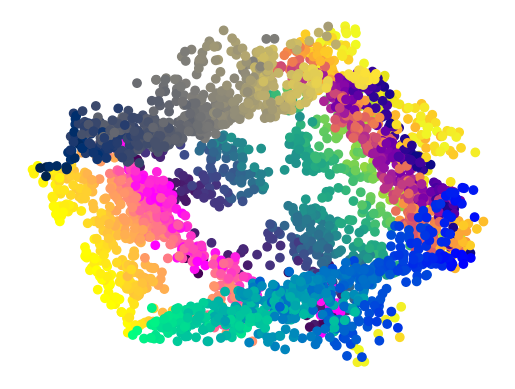

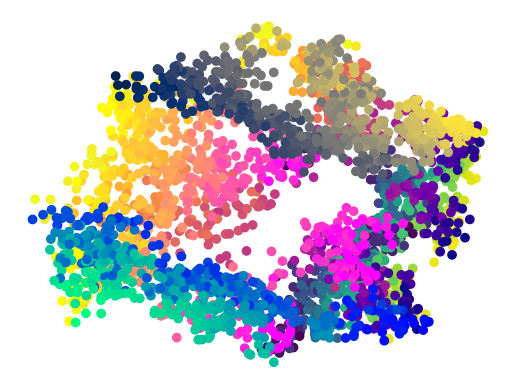

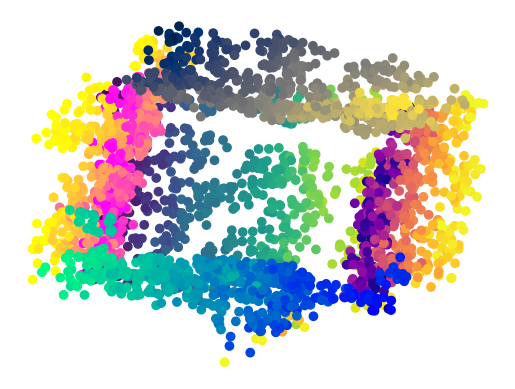

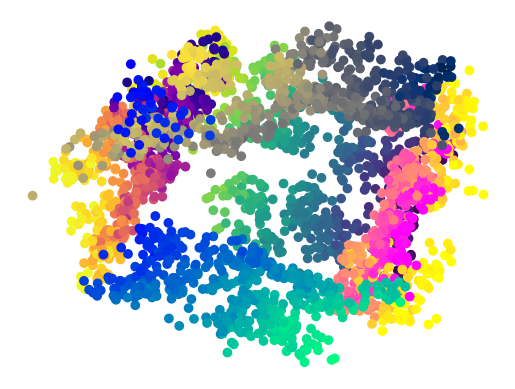

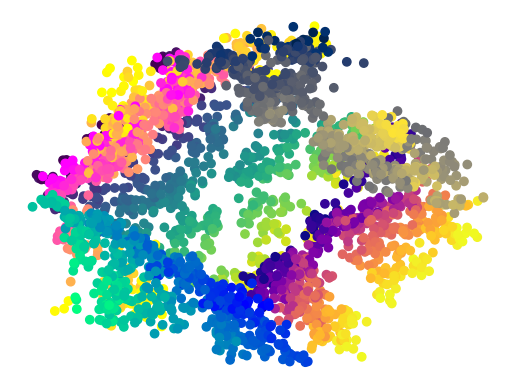

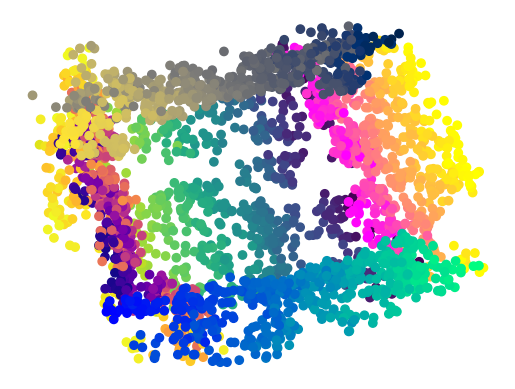

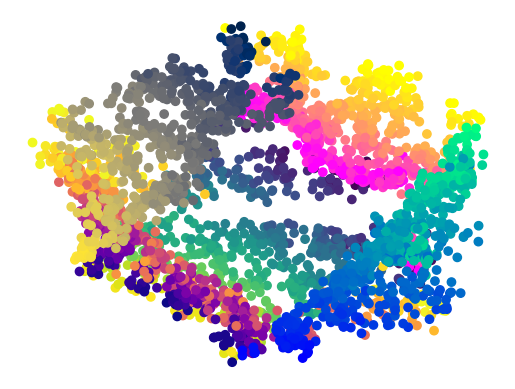

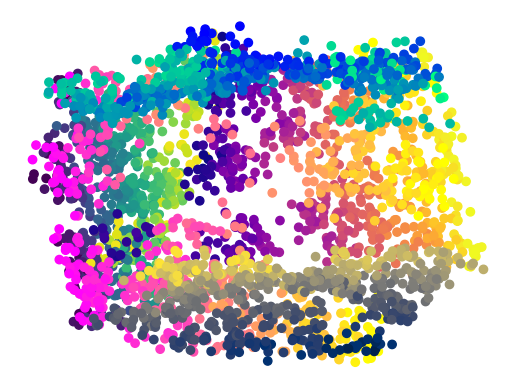

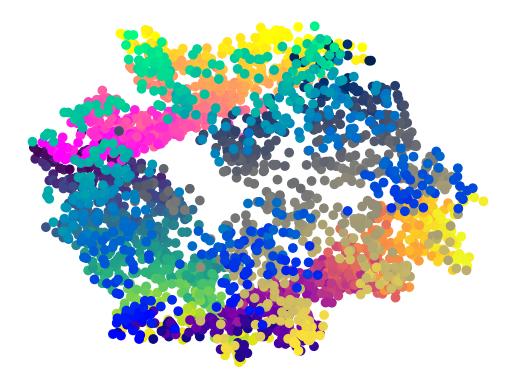

In [9]:
path_to_pickle = (Path(output_dir).joinpath(Path("layouts.pickle"))).resolve()
with open(path_to_pickle, 'rb') as file:
    layouts_s = pickle.load(file)

for layout in layouts_s[1]:
    cube.plot_2d(layout=layout)
    # show_generation_metrics(layout, average_speed=True)


